<a href="https://colab.research.google.com/github/Blue-BigData/pandas-practice/blob/main/230110_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이나틱호 생존자 데이터 분석
어떤 사람이 생존할 가능성이 높은가?

---

https://www.kaggle.com/c/titanic

칼럼 정보
* Survival : 생존 여부
* Pclass : 티켓의 클래스
* Name : 탑승자 이름
* Sex : 성별
* Age : 나이
* Sibsp : 탐승한 형제자매, 배우자의 수
* Parch : 탑승한 부모, 자녀의 수
* Ticket : 티켓 번호
* Fare : 요금
* Cabin : 케빈 번호
* Embarked : 승선지 (항구)

## 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/gdrive')

import pandas as pd

train = pd.read_csv('/gdrive/My Drive/Pandas_Practice/titanic_data/train.csv')
test = pd.read_csv('/gdrive/My Drive/Pandas_Practice/titanic_data/test.csv')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


### train 데이터 탐색하기

In [2]:
# Train 데이터를 탐색해보자
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 누락된 값이 얼마나 있는지 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### test 데이터 탐색하기

In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test.shape

(418, 11)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 시각화로 데이터 살펴보기(EDA)

In [11]:
# 시각화 라이브러리 
import matplotlib.pyplot as plt

# 폰트 지원
plt.rc('font', family='NanumBarunGothic')

In [12]:
# 한글 깨짐 방지 코드(런타임 재실행 필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

### 선실별 승객의 비율

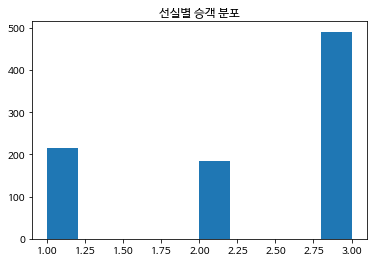

In [13]:
# 기본 제공 차트
plt.title("선실별 승객 분포")
plt.hist(x = train['Pclass'])
plt.show()

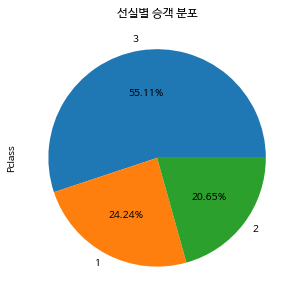

In [14]:
# 파이 차트
plt.title('선실별 승객 분포')
pclass_plt = train['Pclass'].value_counts()
pclass_plt.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10, 5))
plt.show()

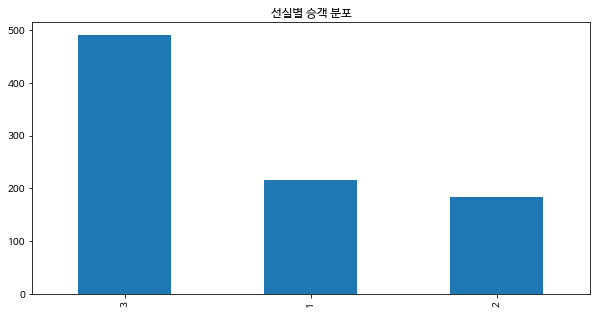

In [15]:
# 바 차트
plt.title('선실별 승객 분포')
pclass_plt = train['Pclass'].value_counts()
pclass_plt.plot(kind = 'bar', figsize = (10, 5))
plt.show()

### 그래프 함수 만들기

In [16]:
# 선 그래프
def chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(figsize=(10,5))

# 막대 그래프
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

# 파이 차트
def pie_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='pie', subplots=True, autopct='%.2f%%', figsize=(10,5))

# 히스토그램
def hist_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='hist', figsize=(10,5))

# 박스 그래프
def box_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='box', figsize=(10,5))


# 밀도 그래프
def kde_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='kde', figsize=(10,5))

* kind = bar : 막대 그리프로 출력
* stack : 막대를 스택 형태로 표현할 지 여부
* figsize : 그래프 사이즈를 조절

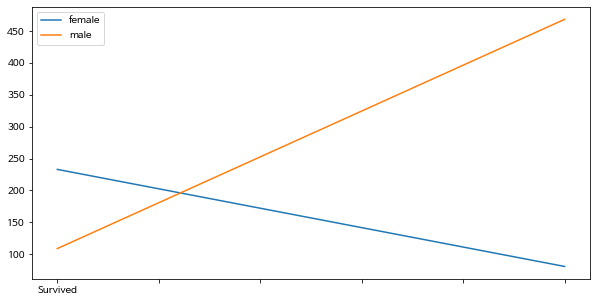

In [17]:
chart('Sex')

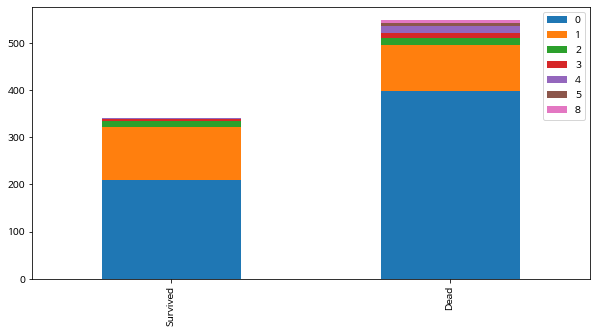

In [18]:
bar_chart('SibSp')

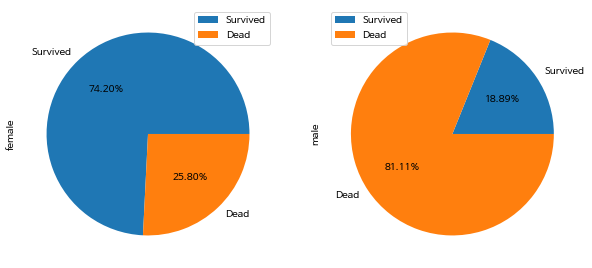

In [19]:
pie_chart('Sex')

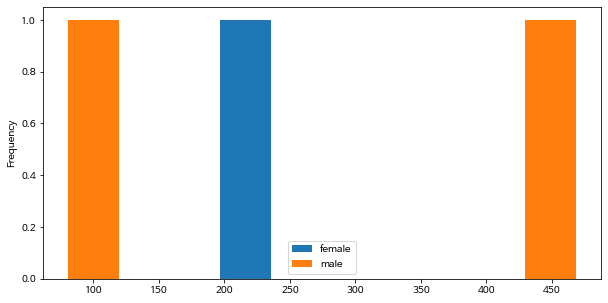

In [20]:
hist_chart('Sex')

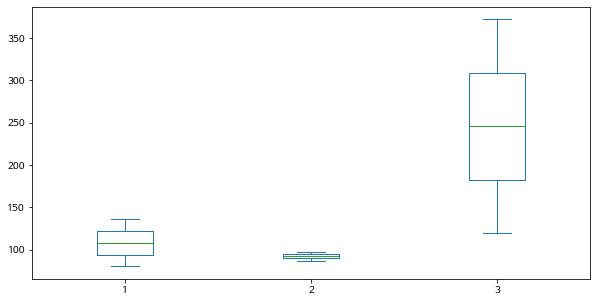

In [21]:
box_chart('Pclass')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


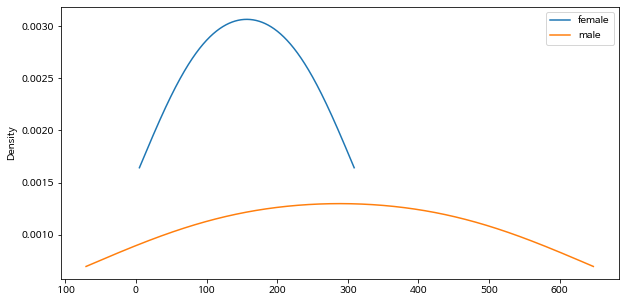

In [22]:
kde_chart('Sex')

## Feature Engineering
* 머신러닝 알고리즘을 작동하기 위해 데이터에 대한 도메인 지식을 활용하여 특징(feature)를 만들어 내는 과정이다.

### 이름과 생존율의 연관

In [23]:
# train, test 데이터를 합친후 .앞에 있는 값에 대해 파악하기
train_test_data = [train, test]
for dataset in train_test_data:
  dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) 

train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [24]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

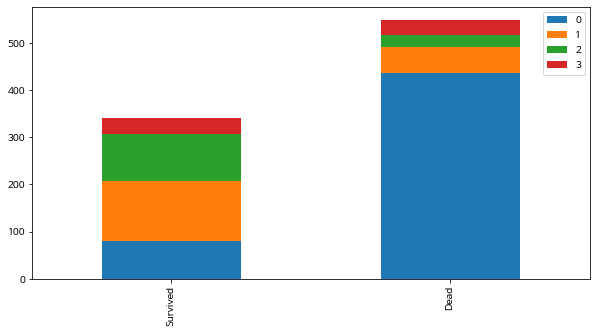

In [25]:
# mapping으로 항목의 개수 줄여주기
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col": 3, 'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 'Capt': 3,
                 'Sir': 3, 'Don': 3, 'Mme':3, 'Jonkheer': 3, 'Countess': 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

# train.head()
# test.head()

bar_chart('Title')

이름과 생존은 연관이 있음을 확인할 수 있었다.

### Age 누락값 채우기, Binning
* 누락값에 전체 나이 평균을 넣어주는 방법
* 누락값에 남성, 여성을 나누어 평균 나이를 구하여 넣어주는 방법

#### Age 누락값 채우기

In [26]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [27]:
# Missing Age를 각 Title에 대한 연령의 중간값 으로 채운다(Mr, Mrs, Miss, Others)
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)   # inplcae : 원본에 덮어쓰기

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

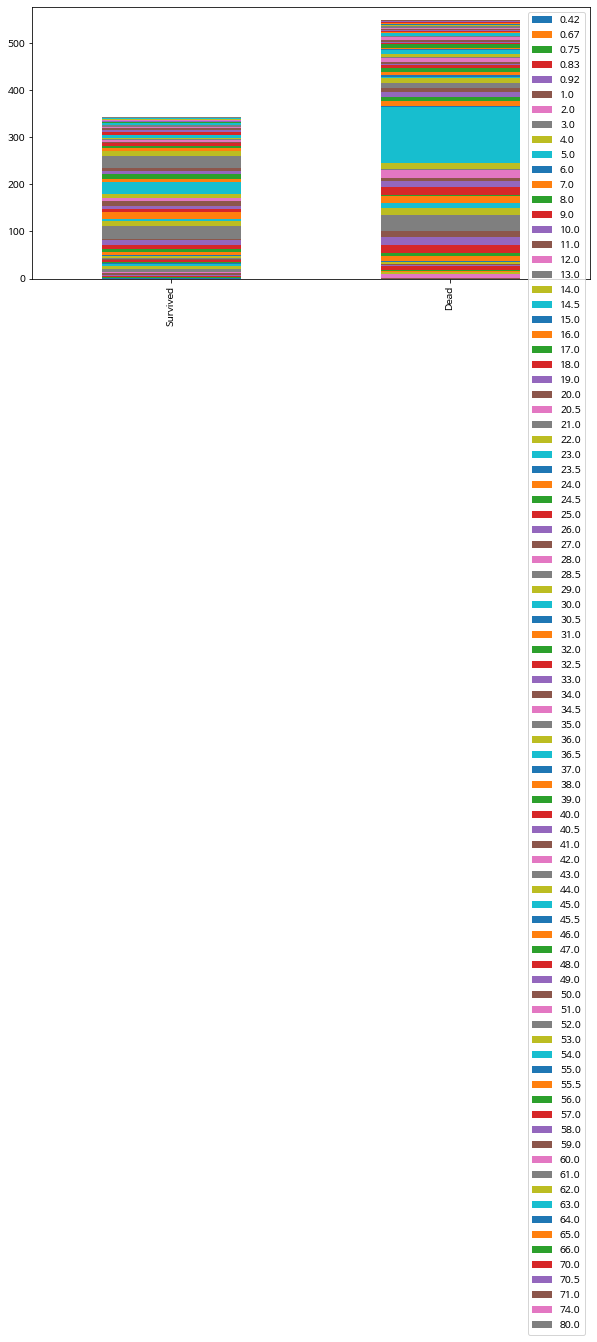

In [28]:
bar_chart('Age')

#### Age Binning

In [29]:
# 연령의 범위로 나누어 Binning
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S,0


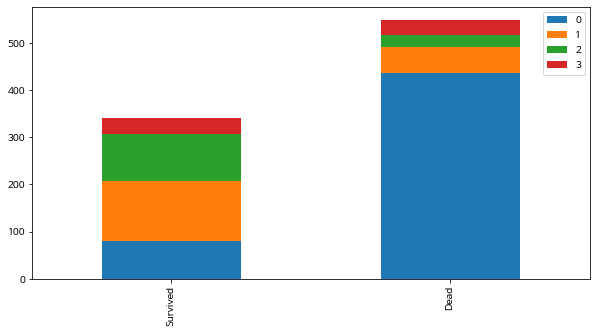

In [30]:
bar_chart('Title')

16세 이하의 아이들이 가장 생존률이 높음을 확인할 수 있었다.

### Embarked 누락값 채우기

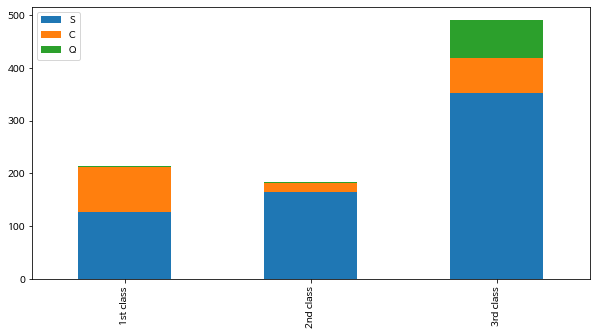

In [31]:
# Pclass의 등급별로 탑승 선착장의 인원수를 세어 그래프로 그려준다
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']

df.plot(kind='bar', stacked=True, figsize=(10,5))

대다수가 S선착장에서 탑승했기에 누락값을 S로 채워도 무방할 것이라 예측되었다.

In [32]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

# train.head()
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

### Fare Binning

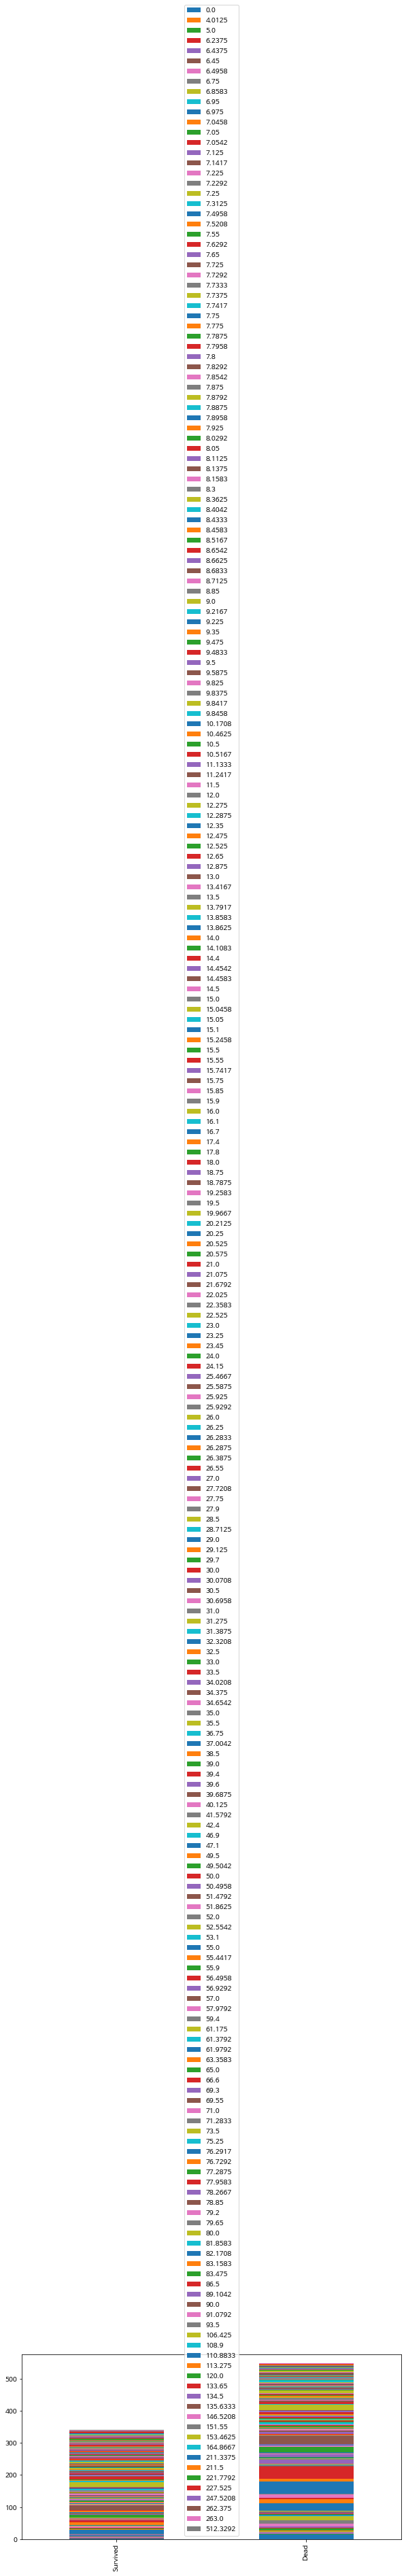

In [33]:
# Binning 전
bar_chart('Fare')

In [34]:
# Binning 후
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

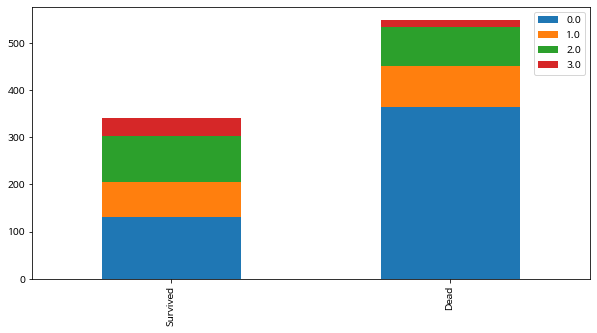

In [35]:
bar_chart('Fare')

티켓의 가격이 저렴할수록 사망 확률이 높았다.

## 인사이트 도출해보기
### 중앙일보 기사 발췌
---
연구결과에 따르면 전체 탑승자 약 1만 5000명 중 승무원은 대략 60%, 선장은 40%, 남성 승객은 37%, 여성 승객은 27%, 어린이 승객은 15%가 침몰 사고시 살아남았다

연구진은 타이타닉 사고시 여성 생존자가 많은 것은 선장의 책임감 있는 리더십 때문으로 분석 했다.

당시 타이타닉호 선장이였던 에드워드 존 스미스는 승객중 어린이, 여자, 남자 순으로 탈출토록 했고, 총으로 공포를 쏘면서 이성을 잃은 사람들이 질서를 유지하도록 하게 했으며, 배와 운명을 함꼐하는 직업의식과 책임감을 보였다.


* 선장 에드워드 존 스미스의 노력으로 어린이,여자, 남자 순으로 탈출하도록 했기에 나이별로 생존율을 확인했을 때 아이들(16세 이하)의 생존율이 가장 높게 나타났던 것이다. 

* 마찬가지로 이름을 보아도 Mr보다 Miss, 즉 남자보다 여자의 생존율이 높았던것 역시 같은 이유이다.

* 또한 타이타닉호의 객실과도 관련지어볼 수 있는데, 상대적으로 비싼 가격의 객실이 가운데에 몰려있고, 저렴한 객실이 사이드로 배치되어있었다. 배가 침몰하면 한쪽(앞 또는 뒤)부터 가라앉았기에 저렴한 객실에 머물던 승객들이 더 많이 사망했던 것을 유추할 수 있다.